# Generate a product dependency graph from ODC DEA product

In [3]:
import string
from graphviz import Digraph
import datacube
dc = datacube.Datacube()

# Get Candidate Product UUID

In [4]:
for i in dc.list_products().name:
    print(i)
    # Print measurements for each product
    #for j in dc.list_measurements().query('product == @i').name:
    #    print(i, '--',j)

bom_rainfall_grids
dsm
dsm1sv10
fc_percentile_albers_annual
ga_ls5t_ard_3
ga_ls5t_level1_3
ga_ls7e_ard_3
ga_ls7e_level1_3
ga_ls8c_ard_3
ga_ls8c_level1_3
gamma_ray
high_tide_comp_20p
high_tide_comp_count
item_v2
item_v2_conf
landsat_barest_earth
low_tide_comp_20p
low_tide_comp_count
ls5_fc_albers
ls5_level1_scene
ls5_nbar_albers
ls5_nbar_scene
ls5_nbart_albers
ls5_nbart_geomedian_annual
ls5_nbart_scene
ls5_nbart_tmad_annual
ls5_pq_albers
ls5_pq_legacy_scene
ls5_pq_scene
ls5_satellite_telemetry_data
ls5_usgs_l2c1
ls7_fc_albers
ls7_level1_scene
ls7_nbar_albers
ls7_nbar_scene
ls7_nbart_albers
ls7_nbart_geomedian_annual
ls7_nbart_scene
ls7_nbart_tmad_annual
ls7_pq_albers
ls7_pq_legacy_scene
ls7_pq_scene
ls7_satellite_telemetry_data
ls7_usgs_l2c1
ls8_barest_earth_mosaic
ls8_fc_albers
ls8_level1_oli_scene
ls8_level1_scene
ls8_nbar_albers
ls8_nbar_oli_albers
ls8_nbar_oli_scene
ls8_nbar_scene
ls8_nbart_albers
ls8_nbart_geomedian_annual
ls8_nbart_oli_albers
ls8_nbart_oli_scene
ls8_nbart_scene
ls

In [13]:
def get_sample_product_id(product):
    # get a sample id to represent the product
    # TODO query
    sample_id = dc.index.datasets.search_eager(product=product)[0].metadata_doc['id']
    return(sample_id)

In [6]:
def get_source_product(sample_id):
    # retrieve a sample metadata source using the sample_id but with sources included (excluded by default)
    sample_md = dc.index.datasets.get(sample_id, include_sources=True)
   
    sources_dict = {}
    product_list = []
    
    for i in sample_md.sources:
        
        sources_dict[sample_md.sources[i].type.name] = str(sample_md.sources[i].id)
        
    return(({sample_md.type.name: list(set(sources_dict))} , sources_dict))
    

In [16]:
product_id = get_sample_product_id('high_tide_comp_20p')

In [7]:
# Sample product IDs
product_id = '67eadd05-3500-47dd-8929-fcbb4c35693d' #(TMAD)
product_id = 'b14d5398-24ca-4100-8094-09d6b17d88f7' #WOFS filtered summary)
product_id = 'efd31370-bf2d-45b3-9302-9e04fa7efaf8' #WOFS Albers

In [17]:
id_list = []
sources_list = []
# get an initial set of UUIDs
tree, sources_dict = get_source_product(product_id)

# for each UUID - get their decendent UUID and work up the tree until no sources returned
for source in sources_dict:
    id_list.append(sources_dict[source])
sources_list.append(tree)
    
# while requests for source products return results i.e. not {},
while len(id_list) != 0:
    
    # for each UUID in the list
    for i in id_list:        
        id_list.remove(i)

        tree, sources_dict = get_source_product(i)
        if tree not in sources_list:
            sources_list.append(tree)
        if not sources_dict == {}: 
            for source in sources_dict:
                id_list.append(sources_dict[source])
                    
sources_list

[{'high_tide_comp_20p': ['ls5_nbar_albers',
   'ls7_nbar_albers',
   'ls7_pq_albers',
   'ls8_pq_albers',
   'ls5_pq_albers',
   'ls8_nbar_albers']},
 {'ls5_nbar_albers': ['ls5_nbar_scene']},
 {'ls7_nbar_albers': ['ls7_nbar_scene']},
 {'ls8_nbar_albers': ['ls8_nbar_scene']},
 {'ls5_nbar_scene': ['ls5_level1_scene']},
 {'ls8_nbar_scene': ['ls8_level1_scene']},
 {'ls8_level1_scene': ['ls8_satellite_telemetry_data']},
 {'ls5_pq_albers': ['ls5_pq_scene']},
 {'ls8_pq_albers': ['ls8_pq_scene']},
 {'ls5_level1_scene': ['ls5_satellite_telemetry_data']},
 {'ls5_pq_scene': ['ls5_level1_scene', 'ls5_nbar_scene']},
 {'ls5_satellite_telemetry_data': []},
 {'ls7_pq_albers': ['ls7_pq_scene']},
 {'ls8_satellite_telemetry_data': []},
 {'ls7_pq_scene': ['ls7_level1_scene', 'ls7_nbar_scene']},
 {'ls7_level1_scene': ['ls7_satellite_telemetry_data']},
 {'ls7_satellite_telemetry_data': []},
 {'ls7_nbar_scene': ['ls7_level1_scene']},
 {'ls8_pq_scene': ['ls8_level1_scene', 'ls8_nbar_scene']}]

In [18]:
alphabet = string.ascii_uppercase
count = 0
dot_list = []
dot = Digraph(comment='DEA Product Dependency Graphviz')
index_alpha = {}
for i in sources_list:
    index_alpha[list(i.keys())[0]] = alphabet[count]
    dot_list.append((alphabet[count], list(i.keys())[0]))
    dot.node(alphabet[count], list(i.keys())[0])
    count = count+1
#for i in dot_list:
#    print(i)
print(dot.source)

// DEA Product Dependency Graphviz
digraph {
	A [label=high_tide_comp_20p]
	B [label=ls5_nbar_albers]
	C [label=ls7_nbar_albers]
	D [label=ls8_nbar_albers]
	E [label=ls5_nbar_scene]
	F [label=ls8_nbar_scene]
	G [label=ls8_level1_scene]
	H [label=ls5_pq_albers]
	I [label=ls8_pq_albers]
	J [label=ls5_level1_scene]
	K [label=ls5_pq_scene]
	L [label=ls5_satellite_telemetry_data]
	M [label=ls7_pq_albers]
	N [label=ls8_satellite_telemetry_data]
	O [label=ls7_pq_scene]
	P [label=ls7_level1_scene]
	Q [label=ls7_satellite_telemetry_data]
	R [label=ls7_nbar_scene]
	S [label=ls8_pq_scene]
}


In [19]:
dot_edges = []
for source in sources_list:
    print(source)
    for i in source[list(source.keys())[0]]:
        if not i == None: 
            dot_edges.append(index_alpha[i]+index_alpha[list(source.keys())[0]])
dot.edges(dot_edges)
print(dot_edges)

{'high_tide_comp_20p': ['ls5_nbar_albers', 'ls7_nbar_albers', 'ls7_pq_albers', 'ls8_pq_albers', 'ls5_pq_albers', 'ls8_nbar_albers']}
{'ls5_nbar_albers': ['ls5_nbar_scene']}
{'ls7_nbar_albers': ['ls7_nbar_scene']}
{'ls8_nbar_albers': ['ls8_nbar_scene']}
{'ls5_nbar_scene': ['ls5_level1_scene']}
{'ls8_nbar_scene': ['ls8_level1_scene']}
{'ls8_level1_scene': ['ls8_satellite_telemetry_data']}
{'ls5_pq_albers': ['ls5_pq_scene']}
{'ls8_pq_albers': ['ls8_pq_scene']}
{'ls5_level1_scene': ['ls5_satellite_telemetry_data']}
{'ls5_pq_scene': ['ls5_level1_scene', 'ls5_nbar_scene']}
{'ls5_satellite_telemetry_data': []}
{'ls7_pq_albers': ['ls7_pq_scene']}
{'ls8_satellite_telemetry_data': []}
{'ls7_pq_scene': ['ls7_level1_scene', 'ls7_nbar_scene']}
{'ls7_level1_scene': ['ls7_satellite_telemetry_data']}
{'ls7_satellite_telemetry_data': []}
{'ls7_nbar_scene': ['ls7_level1_scene']}
{'ls8_pq_scene': ['ls8_level1_scene', 'ls8_nbar_scene']}
['BA', 'CA', 'MA', 'IA', 'HA', 'DA', 'EB', 'RC', 'FD', 'JE', 'GF', 'N

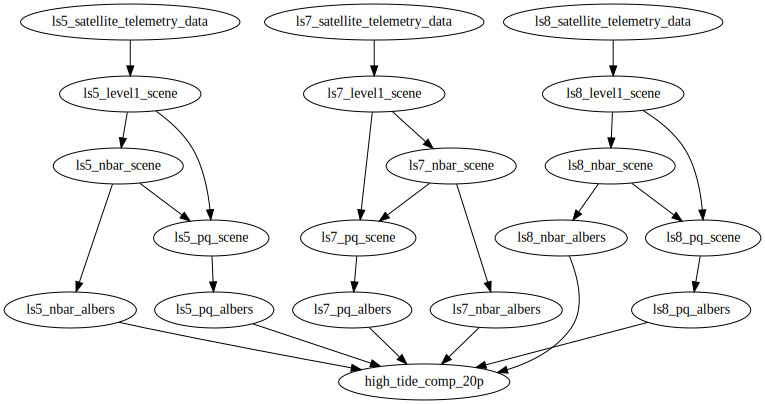

In [20]:
dot